In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

from components import *

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [2]:
BATCH_SIZE = 128
INPUT_SIZE = Generator.INPUT_SIZE
REAL_LABEL, FAKE_LABEL = 1, 0
dataloader = get_data_loader(train=True, batch_size=BATCH_SIZE)

In [3]:
netG = Generator().to(device)
netD = Discriminator().to(device)
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

criterion = nn.BCELoss().to(device)

G_losses, D_losses = [], []

In [4]:
def train(num_epochs = 1):

    label_real = torch.full((BATCH_SIZE,), REAL_LABEL, device=device, dtype=torch.float)
    label_fake = torch.full((BATCH_SIZE,), FAKE_LABEL, device=device, dtype=torch.float)

    for epoch in range(num_epochs):
        print('   EPOCH: ', epoch)
        for i, data in enumerate(dataloader, 0):
            # ===========TRAIN_DISCRIMINSTOR============
            netD.zero_grad()
            data_real = data[0].to(device)
            output_real = netD(data_real).view(-1)
            errD_real = criterion(output_real, label_real)
            errD_real.backward()
            D_x = output_real.mean().item()

            noise = torch.randn(BATCH_SIZE, INPUT_SIZE, 1, 1, device=device)
            data_fake = netG(noise)
            output_fake = netD(data_fake.detach()).view(-1)
            errD_fake = criterion(output_fake, label_fake)
            errD_fake.backward()
            D_G_z1 = output_fake.mean().item()

            errD = errD_real + errD_fake
            optimizerD.step()

            # ===============TRAIN_GENERATOR===============
            netG.zero_grad()
            output = netD(data_fake).view(-1)
            errG = criterion(output, label_real)

            errG.backward()
            D_G_z2 = output.mean().item()
            optimizerG.step()

            # Output training stats
            if i % 100 == 0:
                print('[%.3d/%d]   Loss_D: %.4f   Loss_G: %.4f   D(x): %.4f   D(G(z)): %.4f / %.4f'
                      % (i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

            G_losses.append(errG.item())
            D_losses.append(errD.item())


## TRAINING PROCESS

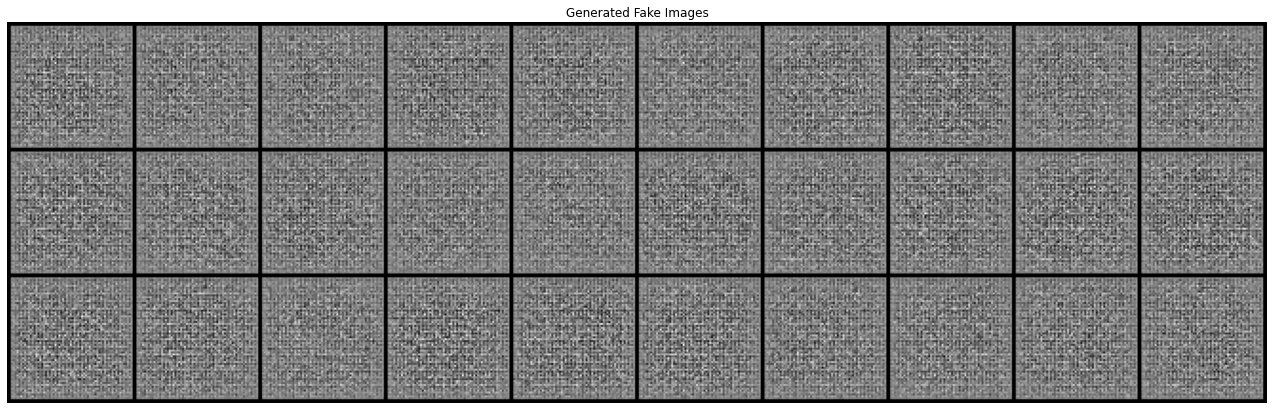

In [5]:
generate_images(netG)

In [6]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 1.8839   Loss_G: 5.6897   D(x): 0.5891   D(G(z)): 0.6451 / 0.0052
[100/468]   Loss_D: 0.1325   Loss_G: 6.9610   D(x): 0.9523   D(G(z)): 0.0590 / 0.0012
[200/468]   Loss_D: 0.1332   Loss_G: 5.2372   D(x): 0.9427   D(G(z)): 0.0578 / 0.0104
[300/468]   Loss_D: 0.0768   Loss_G: 4.2249   D(x): 0.9746   D(G(z)): 0.0479 / 0.0216
[400/468]   Loss_D: 0.0695   Loss_G: 3.8419   D(x): 0.9559   D(G(z)): 0.0213 / 0.0298
   EPOCH:  1
[000/468]   Loss_D: 0.1657   Loss_G: 3.4517   D(x): 0.9022   D(G(z)): 0.0516 / 0.0476
[100/468]   Loss_D: 1.3256   Loss_G: 5.0428   D(x): 0.9944   D(G(z)): 0.6259 / 0.0186
[200/468]   Loss_D: 0.0471   Loss_G: 4.0281   D(x): 0.9687   D(G(z)): 0.0144 / 0.0263
[300/468]   Loss_D: 0.0886   Loss_G: 3.6720   D(x): 0.9437   D(G(z)): 0.0265 / 0.0378
[400/468]   Loss_D: 0.3496   Loss_G: 1.2171   D(x): 0.7540   D(G(z)): 0.0440 / 0.3400
   EPOCH:  2
[000/468]   Loss_D: 0.3470   Loss_G: 2.3547   D(x): 0.7571   D(G(z)): 0.0375 / 0.1231
[100/468]   Los

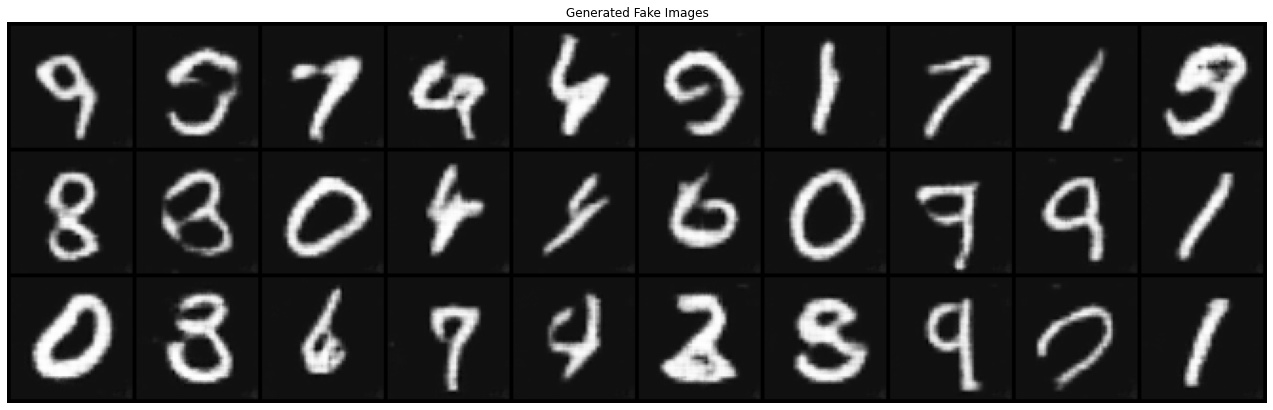

In [7]:
generate_images(netG)

In [8]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0194   Loss_G: 5.1637   D(x): 0.9872   D(G(z)): 0.0062 / 0.0113
[100/468]   Loss_D: 0.3833   Loss_G: 2.3414   D(x): 0.7894   D(G(z)): 0.0950 / 0.1462
[200/468]   Loss_D: 0.0120   Loss_G: 6.7235   D(x): 0.9903   D(G(z)): 0.0021 / 0.0029
[300/468]   Loss_D: 0.0181   Loss_G: 5.7699   D(x): 0.9903   D(G(z)): 0.0080 / 0.0053
[400/468]   Loss_D: 0.0114   Loss_G: 5.3089   D(x): 0.9975   D(G(z)): 0.0088 / 0.0086
   EPOCH:  1
[000/468]   Loss_D: 0.0198   Loss_G: 6.1535   D(x): 0.9955   D(G(z)): 0.0149 / 0.0036
[100/468]   Loss_D: 0.9431   Loss_G: 1.2052   D(x): 0.4857   D(G(z)): 0.0650 / 0.3813
[200/468]   Loss_D: 0.2180   Loss_G: 4.5027   D(x): 0.9557   D(G(z)): 0.1382 / 0.0185
[300/468]   Loss_D: 0.7148   Loss_G: 1.6715   D(x): 0.5742   D(G(z)): 0.0419 / 0.2895
[400/468]   Loss_D: 0.6328   Loss_G: 2.6535   D(x): 0.8048   D(G(z)): 0.2890 / 0.1022
   EPOCH:  2
[000/468]   Loss_D: 0.8565   Loss_G: 6.3266   D(x): 0.9740   D(G(z)): 0.4966 / 0.0032
[100/468]   Los

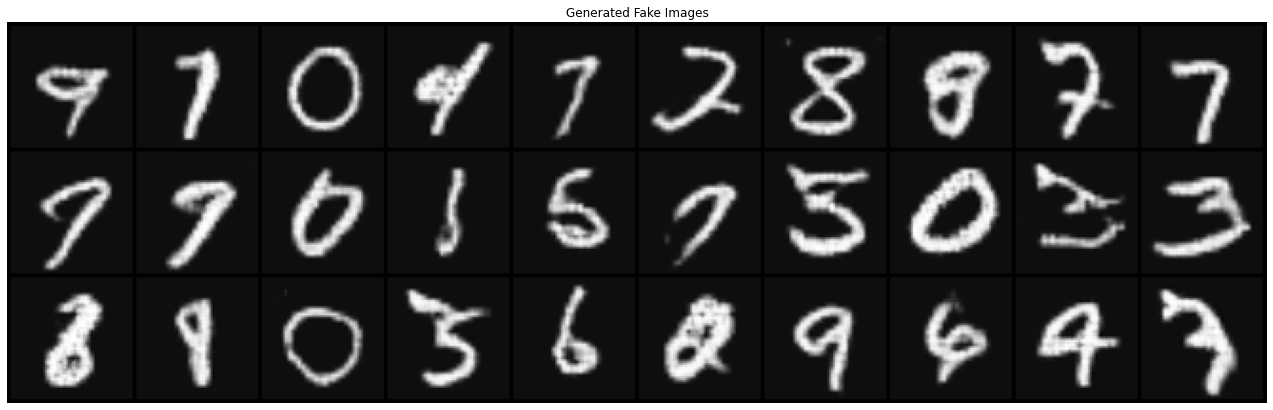

In [9]:
generate_images(netG)

In [10]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0053   Loss_G: 6.6327   D(x): 0.9973   D(G(z)): 0.0025 / 0.0024
[100/468]   Loss_D: 0.0330   Loss_G: 7.8600   D(x): 0.9750   D(G(z)): 0.0003 / 0.0008
[200/468]   Loss_D: 0.0161   Loss_G: 6.7839   D(x): 0.9984   D(G(z)): 0.0142 / 0.0023
[300/468]   Loss_D: 0.8240   Loss_G: 1.3237   D(x): 0.5454   D(G(z)): 0.0523 / 0.3228
[400/468]   Loss_D: 0.1026   Loss_G: 4.2388   D(x): 0.9671   D(G(z)): 0.0617 / 0.0271
   EPOCH:  1
[000/468]   Loss_D: 0.1673   Loss_G: 3.0846   D(x): 0.8735   D(G(z)): 0.0163 / 0.0723
[100/468]   Loss_D: 0.2011   Loss_G: 3.2809   D(x): 0.8937   D(G(z)): 0.0736 / 0.0626
[200/468]   Loss_D: 0.0532   Loss_G: 6.1916   D(x): 0.9931   D(G(z)): 0.0437 / 0.0032
[300/468]   Loss_D: 0.0404   Loss_G: 6.4483   D(x): 0.9977   D(G(z)): 0.0355 / 0.0028
[400/468]   Loss_D: 0.0156   Loss_G: 6.1061   D(x): 0.9913   D(G(z)): 0.0062 / 0.0053
   EPOCH:  2
[000/468]   Loss_D: 0.0020   Loss_G: 7.8322   D(x): 0.9987   D(G(z)): 0.0007 / 0.0008
[100/468]   Los

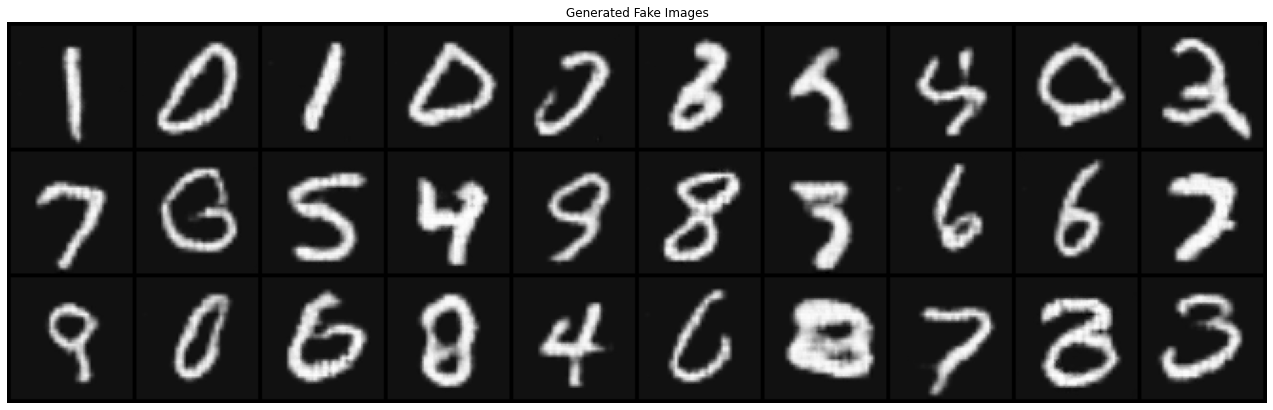

In [11]:
generate_images(netG)

In [12]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0128   Loss_G: 6.0688   D(x): 0.9922   D(G(z)): 0.0048 / 0.0049
[100/468]   Loss_D: 0.0198   Loss_G: 7.5191   D(x): 0.9960   D(G(z)): 0.0155 / 0.0010
[200/468]   Loss_D: 0.2056   Loss_G: 3.2280   D(x): 0.8599   D(G(z)): 0.0274 / 0.0627
[300/468]   Loss_D: 0.0250   Loss_G: 5.5686   D(x): 0.9936   D(G(z)): 0.0180 / 0.0079
[400/468]   Loss_D: 0.2330   Loss_G: 4.7663   D(x): 0.9579   D(G(z)): 0.1546 / 0.0146
   EPOCH:  1
[000/468]   Loss_D: 0.0663   Loss_G: 5.9423   D(x): 0.9890   D(G(z)): 0.0512 / 0.0048
[100/468]   Loss_D: 1.2461   Loss_G: 6.4240   D(x): 0.9908   D(G(z)): 0.6155 / 0.0027
[200/468]   Loss_D: 0.0680   Loss_G: 4.6110   D(x): 0.9711   D(G(z)): 0.0358 / 0.0173
[300/468]   Loss_D: 0.8806   Loss_G: 5.3326   D(x): 0.9274   D(G(z)): 0.4525 / 0.0105
[400/468]   Loss_D: 0.0147   Loss_G: 5.4517   D(x): 0.9975   D(G(z)): 0.0118 / 0.0095
   EPOCH:  2
[000/468]   Loss_D: 0.0069   Loss_G: 6.9655   D(x): 0.9953   D(G(z)): 0.0021 / 0.0021
[100/468]   Los

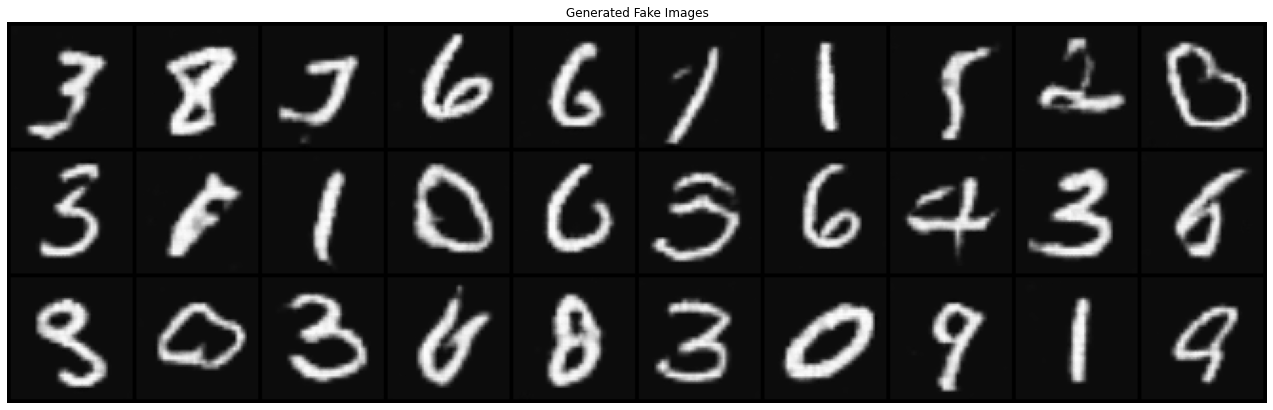

In [13]:
generate_images(netG)

In [14]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0189   Loss_G: 5.9196   D(x): 0.9983   D(G(z)): 0.0170 / 0.0049
[100/468]   Loss_D: 0.0049   Loss_G: 6.8907   D(x): 0.9978   D(G(z)): 0.0027 / 0.0021
[200/468]   Loss_D: 0.3747   Loss_G: 2.4661   D(x): 0.8599   D(G(z)): 0.1552 / 0.1277
[300/468]   Loss_D: 0.0844   Loss_G: 5.7591   D(x): 0.9954   D(G(z)): 0.0681 / 0.0066
[400/468]   Loss_D: 0.1853   Loss_G: 5.8410   D(x): 0.9890   D(G(z)): 0.1444 / 0.0042
   EPOCH:  1
[000/468]   Loss_D: 0.0776   Loss_G: 5.2679   D(x): 0.9320   D(G(z)): 0.0014 / 0.0096
[100/468]   Loss_D: 0.0104   Loss_G: 6.3149   D(x): 0.9942   D(G(z)): 0.0046 / 0.0037
[200/468]   Loss_D: 0.0068   Loss_G: 6.0376   D(x): 0.9971   D(G(z)): 0.0038 / 0.0041
[300/468]   Loss_D: 0.0045   Loss_G: 6.8601   D(x): 0.9980   D(G(z)): 0.0025 / 0.0021
[400/468]   Loss_D: 0.0034   Loss_G: 7.0658   D(x): 0.9991   D(G(z)): 0.0025 / 0.0019
   EPOCH:  2
[000/468]   Loss_D: 0.0040   Loss_G: 6.8534   D(x): 0.9975   D(G(z)): 0.0015 / 0.0023
[100/468]   Los

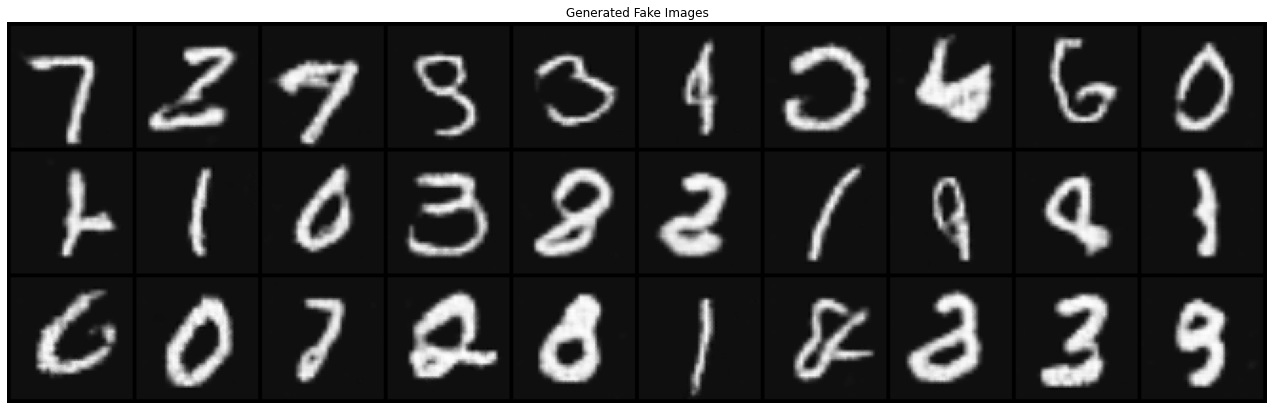

In [15]:
generate_images(netG)

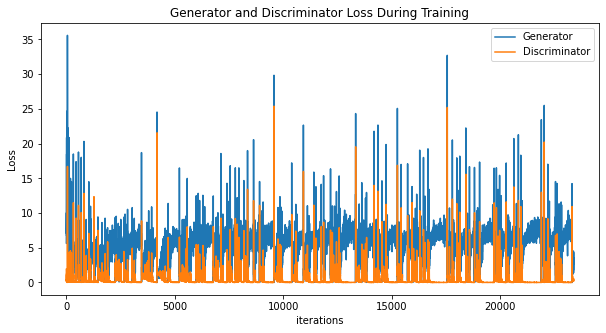

In [16]:
plot_losses(G_losses, D_losses)